# SARIMAX

In [7]:
import warnings
warnings.simplefilter('ignore')

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [2]:
# load the data
# YYYY-MM-DD
df = pd.read_csv('../../_data/nyc_data.csv', index_col=0, parse_dates=True)
future_df = pd.read_csv('../../_data/future.csv', index_col=0, parse_dates=True)
future_df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2021-01-01,NaN,0,0,0,5.00,154.221
2021-01-02,NaN,0,0,0,11.11,264.805
2021-01-03,NaN,0,0,0,3.89,115.499
2021-01-04,NaN,0,0,0,6.67,124.650
2021-01-05,NaN,0,0,0,5.56,77.968


In [3]:
# Rename variable
df = df.rename(columns={'Demand': 'y'})
df.head()

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [4]:
# Extract regressors
train_X = df.iloc[:, 1:]
future_X = future_df.iloc[:, 1:]
future_X.head()

,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,
2021-01-01,0,0,0,5.00,154.221
2021-01-02,0,0,0,11.11,264.805
2021-01-03,0,0,0,3.89,115.499
2021-01-04,0,0,0,6.67,124.650
2021-01-05,0,0,0,5.56,77.968


## SARIMAX model

In [5]:
# get the best parameters
parameters  = pd.read_csv("../../02 Parameter Tuning/02 SARIMAX/out/best_params_sarimax.csv",
                          index_col=0)
parameters

,63
D,1.000000
P,1.000000
Q,1.000000
d,1.000000
p,1.000000
q,1.000000
rmse,59.955275


In [8]:
# store the individuals parameters
p = parameters.loc["p"][0]
d = parameters.loc["d"][0]
q = parameters.loc["q"][0]
P = parameters.loc["P"][0]
D = parameters.loc["D"][0]
Q = parameters.loc["Q"][0]

In [9]:
# Model
# hourly: 24, daily: 7, weekly:52, monthly:12, quarterly:4
model = pm.ARIMA(order=(p, d, q),
                 seasonal_order=(P, D, Q, 7),
                 X=train_X,
                 suppress_warning=True,
                 force_stationarity=False)
model.fit(df.y)

ARIMA(order=(1.0, 1.0, 1.0), seasonal_order=(1.0, 1.0, 1.0, 7))

## Forecasting

In [10]:
# predictions
predictions_sarimax = pd.Series(model.predict(n_periods=len(future_df),
                                              X=future_X)).rename("sarimax")
predictions_sarimax.index = future_df.index
predictions_sarimax

Date
2021-01-01    739.873549
2021-01-02    856.310352
2021-01-03    767.566589
2021-01-04    907.624098
2021-01-05    779.801245
2021-01-06    926.954122
2021-01-07    822.039232
2021-01-08    738.454280
2021-01-09    853.687668
2021-01-10    772.660905
2021-01-11    902.975166
2021-01-12    776.461107
2021-01-13    931.362292
2021-01-14    824.674907
2021-01-15    738.848240
2021-01-16    854.013505
2021-01-17    773.424029
2021-01-18    903.186321
2021-01-19    776.746474
2021-01-20    932.086720
2021-01-21    825.298969
2021-01-22    739.345351
2021-01-23    854.506816
2021-01-24    773.942175
2021-01-25    903.673253
2021-01-26    777.237670
2021-01-27    932.602852
2021-01-28    825.809474
2021-01-29    739.848724
2021-01-30    855.010032
2021-01-31    774.446858
Name: sarimax, dtype: float64

<Axes: xlabel='Date'>

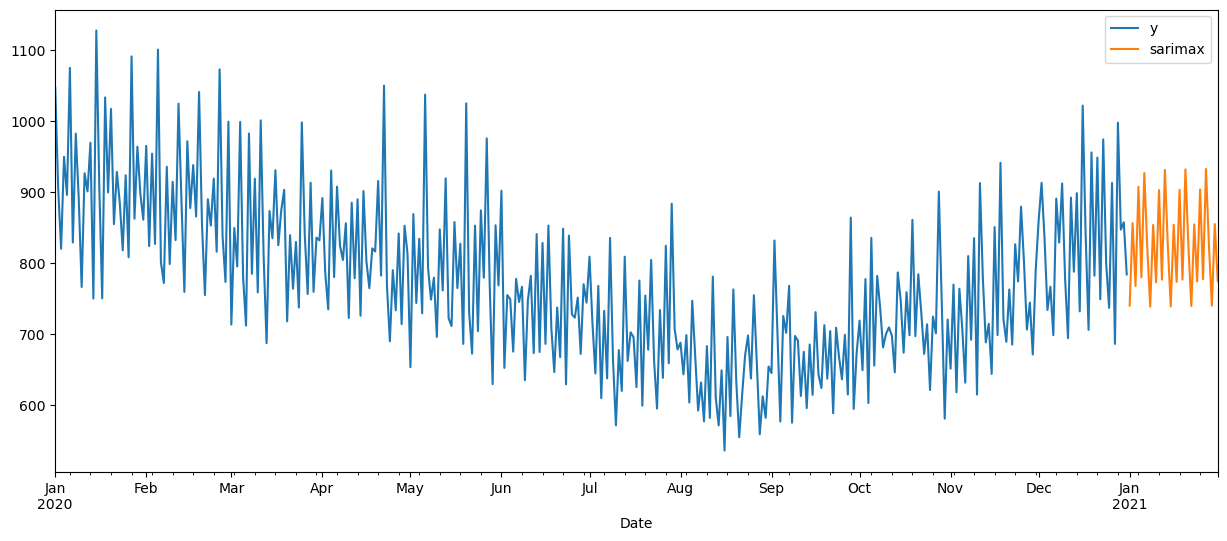

In [11]:
# visulization
df['y']['2020-01-01':].plot(figsize=(15,6), legend=True)
predictions_sarimax.plot(legend=True)

In [12]:
# exporting
predictions_sarimax.to_csv("./out/predictions_sarimax.csv")